In [1]:
import numpy as np
import logging


import matplotlib.pyplot as plt
import myMPSstuff as mps
import myMPOstuff as mpo

from isingMPO import IsingMPO, OneMinusEpsHIsingMPO, expMinusEpsHIsingMPO

from powerMethod import power_method

from oned_ising_tenpy import example_DMRG_tf_ising_finite

In [6]:
# Apply MPO to MPS operations 

LLL = 20

# maximum chi 
chiM = 40

gg = 0.4

# Do it with tenpy 
E_tenpy, psi_tenpy, _ = example_DMRG_tf_ising_finite(LLL, gg, chiM)
Smid_tenpy = psi_tenpy.entanglement_entropy()[(LLL-1)//2]

# Now do it with my power method 

#psi = mps.myMPS(mps.randMPS(LLL))
psi = mps.myMPS([np.ones(2)]*LLL)


Hising = mpo.myMPO(IsingMPO(LLL, J=1., g=gg))
Uising = mpo.myMPO(OneMinusEpsHIsingMPO(LLL, J=1., g=gg, eps=0.1))


opsi, iter, ents, devec, energies = power_method(Uising, psi, chiM = chiM, iters = 100, HMPO = Hising)


print(ents[-1],energies[-1])


finite DMRG, transverse field Ising model
L=20, g=0.40
E = -19.8900466137288
final bond dimensions:  [2, 4, 8, 14, 18, 22, 24, 24, 26, 26, 26, 24, 24, 22, 18, 14, 8, 4, 2]
midchainEE: 0.6943389921906786 


IndexError: tuple index out of range

In [3]:
print(opsi.expValMPO(Hising))
print(opsi.expValMPO(Uising))

-19.89004597893782
2.989004597893783


(-0.1, 0.1)

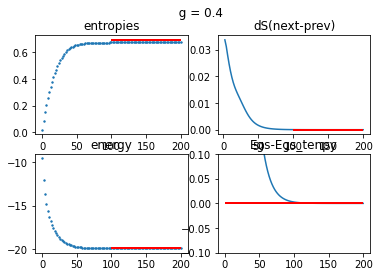

In [4]:

fig, axe = plt.subplots(2,2)
fig.suptitle(f'  g = {gg}')

ax = np.ravel(axe)
ax[0].set_title('entropies')
ax[1].set_title('dS(next-prev)')
ax[2].set_title('energy')
ax[3].set_title('Egs-Egs_tenpy')


ax[0].scatter(iter, ents , s=2)
ax[0].hlines(y=Smid_tenpy, xmin=iter[len(iter)//2], xmax=iter[-1], linewidth=2, color='r')

ax[1].plot(iter, devec)
ax[1].hlines(y=0, xmin=iter[len(iter)//2], xmax=iter[-1], linewidth=2, color='r')

ax[2].scatter(iter, energies, s=2)
ax[2].hlines(y=E_tenpy, xmin=iter[len(iter)//2], xmax=iter[-1], linewidth=2, color='r')


ax[3].plot(iter, [ei - E_tenpy for ei in energies])
ax[3].hlines(y=0, xmin=iter[0], xmax=iter[-1], linewidth=2, color='r')
ax[3].set_ylim(-0.1,0.1)




## what if instead we try and apply Hising directly ? 


In [5]:

LLL = 20

# maximum chi 
chiM = 60

psi = mps.myMPS(mps.randMPS(LLL))

opsi, iter, ents, devec, energies = power_method(Hising, psi, chiM = chiM, iters = 100)


print(ents[-1],energies[-1])

# Now the energy looks good but the entropy is completely off (?)

Returning energies as expectation value of the evolution MPO


100, chi/max 60/60: 100%|██████████| 100/100 [00:52<00:00,  1.92it/s]
ERROR:root:largest entropy is NOT at midchain! (11 vs 10)
ERROR:root:Largest entropy: S(11) = 0.6110956465137042
ERROR:root:entropies = [0.0, 0.5392171311462342, 0.5995469542195306, 0.6091603073441133, 0.6107459261371624, 0.6110246125157862, 0.6110787073507453, 0.6110909163830059, 0.6110941514531198, 0.6110951513550473, 0.6110955371616036, 0.6110956465137042, 0.6110951702499777, 0.6110925836755103, 0.6110813917018662, 0.6110291539284222, 0.6107539086849179, 0.6091739110651876, 0.5995608859385253, 0.5392181539623085, 0.0]


max chi reached: 60 (vs. chiMax = 60)
0.6110955371616036 -19.885101018923976


(-0.1, 0.1)

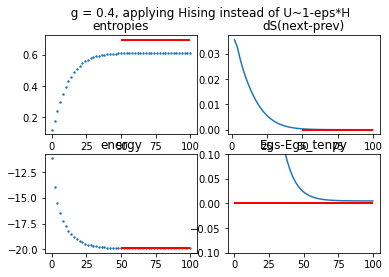

In [6]:

fig, axe = plt.subplots(2,2)
fig.suptitle(f'  g = {gg}, applying Hising instead of U~1-eps*H')

ax = np.ravel(axe)
ax[0].set_title('entropies')
ax[1].set_title('dS(next-prev)')
ax[2].set_title('energy')
ax[3].set_title('Egs-Egs_tenpy')


ax[0].scatter(iter, ents , s=2)
ax[0].hlines(y=Smid_tenpy, xmin=iter[len(iter)//2], xmax=iter[-1], linewidth=2, color='r')

ax[1].plot(iter, devec)
ax[1].hlines(y=0, xmin=iter[len(iter)//2], xmax=iter[-1], linewidth=2, color='r')

ax[2].scatter(iter, energies, s=2)
ax[2].hlines(y=E_tenpy, xmin=iter[len(iter)//2], xmax=iter[-1], linewidth=2, color='r')


ax[3].plot(iter, [ei - E_tenpy for ei in energies])
ax[3].hlines(y=0, xmin=iter[0], xmax=iter[-1], linewidth=2, color='r')
ax[3].set_ylim(-0.1,0.1)



## Critical Ising (g=1)


In [7]:

LLL = 20

# maximum chi 
chiM = 60

gg = 1.


# Do it with tenpy 
E_tenpy, psi_tenpy, _ = example_DMRG_tf_ising_finite(LLL, gg, chiM)
Smid_tenpy = psi_tenpy.entanglement_entropy()[(LLL-1)//2]



# my power method 

psi = mps.myMPS(mps.randMPS(LLL))


Hising = mpo.myMPO(IsingMPO(LLL, J=1.0, g=gg))
Uising = mpo.myMPO(OneMinusEpsHIsingMPO(LLL, J=1., g=gg, eps=0.1))


opsi, iter, ents, devec, energies = power_method(Uising, psi, chiM = chiM, iters = 300, HMPO = Hising)


print(ents[-1],energies[-1])


finite DMRG, transverse field Ising model
L=20, g=1.00
E = -25.1077971116238
final bond dimensions:  [2, 4, 8, 16, 26, 34, 41, 43, 45, 46, 45, 43, 41, 34, 26, 16, 8, 4, 2]
midchainEE: 0.4437994306157701 
Ising MPO, parameters: J=1.0 g=1.0,  shapes:
[(1, 3, 2, 2), (3, 3, 2, 2), (3, 3, 2, 2), (3, 3, 2, 2), (3, 3, 2, 2), (3, 3, 2, 2), (3, 3, 2, 2), (3, 3, 2, 2), (3, 3, 2, 2), (3, 3, 2, 2), (3, 3, 2, 2), (3, 3, 2, 2), (3, 3, 2, 2), (3, 3, 2, 2), (3, 3, 2, 2), (3, 3, 2, 2), (3, 3, 2, 2), (3, 3, 2, 2), (3, 3, 2, 2), (3, 1, 2, 2)]


300, chi/max 59/60: 100%|██████████| 300/300 [03:46<00:00,  1.33it/s]

max chi reached: 60 (vs. chiMax = 60)
0.44206001376593845 -25.10777588549346


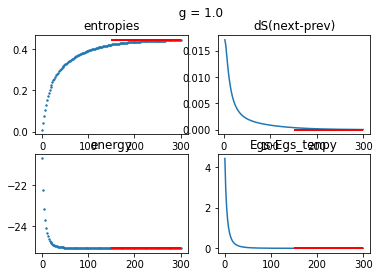

In [8]:

fig, axe = plt.subplots(2,2)
fig.suptitle(f'  g = {gg}')

ax = np.ravel(axe)
ax[0].set_title('entropies')
ax[1].set_title('dS(next-prev)')
ax[2].set_title('energy')
ax[3].set_title('Egs-Egs_tenpy')


ax[0].scatter(iter, ents , s=2)
ax[0].hlines(y=Smid_tenpy, xmin=iter[len(iter)//2], xmax=iter[-1], linewidth=2, color='r')

ax[1].plot(iter, devec)
ax[1].hlines(y=0, xmin=iter[len(iter)//2], xmax=iter[-1], linewidth=2, color='r')

ax[2].scatter(iter, energies, s=2)
ax[2].hlines(y=E_tenpy, xmin=iter[len(iter)//2], xmax=iter[-1], linewidth=2, color='r')


ax[3].plot(iter, [ei - E_tenpy for ei in energies])
ax[3].hlines(y=0, xmin=iter[len(iter)//2], xmax=iter[-1], linewidth=2, color='r')


In [9]:
#New data to check N=4 delta_t =0.1 c_g =0.9
#MPO expected value 1.56831482176985
#Entropy mid chain 0.332330405177682

# Apply MPO to MPS operations 

LLL = 4

# maximum chi 
chiM = 60

gg = 0.9

# Do it with tenpy 
E_tenpy, psi_tenpy, _ = example_DMRG_tf_ising_finite(LLL, gg, chiM)
Smid_tenpy = psi_tenpy.entanglement_entropy()[(LLL-1)//2]

# Now do it with my power method 

psi = mps.myMPS(mps.randMPS(LLL))


Hising = mpo.myMPO(IsingMPO(LLL, J=1., g=gg))
Uising = mpo.myMPO(OneMinusEpsHIsingMPO(LLL, J=1., g=gg, eps=0.1))


opsi, iter, ents, devec, energies = power_method(Uising, psi, chiM = chiM, iters = 200, HMPO = Uising)


print(ents[-1],energies[-1])


finite DMRG, transverse field Ising model
L=4, g=0.90
E = -4.4426730871153
final bond dimensions:  [2, 4, 2]
midchainEE: 0.33445817829069296 
Ising MPO, parameters: J=1.0 g=0.9,  shapes:
[(1, 3, 2, 2), (3, 3, 2, 2), (3, 3, 2, 2), (3, 1, 2, 2)]


200, chi/max 4/5: 100%|██████████| 200/200 [00:07<00:00, 27.56it/s]

max chi reached: 5 (vs. chiMax = 60)
0.3344581784369366 1.444267308686466


In [11]:
opsi.expValMPO(Uising)

array(1.44426731)

In [12]:
LLL = 20

# maximum chi 
chiM = 50

gg = 1.1

# Do it with tenpy 
E_tenpy, psi_tenpy, _ = example_DMRG_tf_ising_finite(LLL, gg, chiM)
Smid_tenpy = psi_tenpy.entanglement_entropy()[(LLL-1)//2]

# Now do it with my power method 

psi = mps.myMPS(mps.randMPS(LLL))


Hising = mpo.myMPO(IsingMPO(LLL, J=1., g=gg))
Uising = mpo.myMPO(expMinusEpsHIsingMPO(LLL, J=1., g=gg, eps=0.1, mode="svd"))


opsi, iter, ents, devec, energies = power_method(Uising, psi, chiM = chiM, iters = 100, HMPO= Hising)


print(ents[-1],energies[-1])

finite DMRG, transverse field Ising model
L=20, g=1.10
E = -26.5698390057306
final bond dimensions:  [2, 4, 8, 16, 26, 33, 37, 40, 42, 42, 42, 40, 37, 33, 26, 16, 8, 4, 2]
midchainEE: 0.3224763897168084 
Ising MPO, parameters: J=1.0 g=1.1,  shapes:
[(1, 3, 2, 2), (3, 3, 2, 2), (3, 3, 2, 2), (3, 3, 2, 2), (3, 3, 2, 2), (3, 3, 2, 2), (3, 3, 2, 2), (3, 3, 2, 2), (3, 3, 2, 2), (3, 3, 2, 2), (3, 3, 2, 2), (3, 3, 2, 2), (3, 3, 2, 2), (3, 3, 2, 2), (3, 3, 2, 2), (3, 3, 2, 2), (3, 3, 2, 2), (3, 3, 2, 2), (3, 3, 2, 2), (3, 1, 2, 2)]


100, chi/max 50/50: 100%|██████████| 100/100 [00:23<00:00,  4.30it/s]

max chi reached: 50 (vs. chiMax = 50)
0.32069461563814256 -26.569105216410247


In [14]:
testsvd = expMinusEpsHIsingMPO(5, J=1., g=1.1, eps=0.1, mode="svd")
np.shape(testsvd[-1])
fi=testsvd[0].reshape(2,2,2)
la=testsvd[-1].reshape(2,2,2)
print(np.all(fi-la < 1e-14))
print(fi-la)

True
[[[ 0.00000000e+00  0.00000000e+00]
  [ 0.00000000e+00  0.00000000e+00]]

 [[ 0.00000000e+00 -3.47469581e-18]
  [-3.05465283e-18 -5.55111512e-17]]]
